# 4.10 Coding Etiquette & Excel Reporting

## Contents list:

### 01. Importing libraries
### 02. Importing data
### 03. Create 'region' column
### 04. Create 'exclusion flag'
### 05. Export data
### 06. Import data
### 07. Create profiling variable
### 08. Export data

### 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 02. Importing data¶

In [2]:
# Project folder path as string
path = r'C:\Users\User\Desktop\Instacart Basket Analysis'

In [3]:
# Step 1 - Import dataframes_merged dataframe using the os library
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'dataframes_merged.pkl'))

In [4]:
# Check shape
df_merged.shape

(32404859, 31)

In [5]:
df_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median__days_since_prior_order',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', '_merge'],
      dtype='object')

- Step 2 - PII data are dropped from the data set in previous exercise.

### 03. Create 'region' column

In [6]:
# Step 3 - Deriving columns with loc ()- creating new column - 'region'
df_merged.loc[df_merged['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts',
'Rhode Island', 'New York', 'Pennsylvania', 'New Jersey', 'Connecticut']), 'region'] = 'Northeast'

In [7]:
# Step 3 - Deriving columns with loc ()- creating new column - 'region'
df_merged.loc[df_merged['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana','Ohio', 'North Dakota','South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'

In [8]:
# Step 3 - Deriving columns with loc ()- creating new column - 'region'
df_merged.loc[df_merged['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky',
'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'

In [9]:
# Step 3 - Deriving columns with loc ()- creating new column - 'region'
df_merged.loc[df_merged['state'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada','Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon',
'California', 'Hawaii']), 'region'] = 'West'

In [10]:
# Frequency of "region" column
df_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [11]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [12]:
# Step 3 - Part_2 - Create crosstab
crosstab = pd.crosstab(df_merged['spending_flag'], df_merged['region'], dropna = False)

In [13]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29265,18642,40579,31242
Low spender,7568060,5704094,10751306,8261671


In [14]:
crosstab.to_clipboard()

### 04. Create 'exclusion flag'

In [15]:
# Step 4 - Create exclusion flag - Deriving columns with loc ()
df_merged.loc[df_merged['max_order'] < 5, 'exclusion_flag'] = 'low_activity'

In [16]:
# Step 4 - Create exclusion flag - Deriving columns with loc ()
df_merged.loc[df_merged['max_order'] >= 5, 'exclusion_flag'] = 'medium_high_activity'

In [17]:
# Frequency of "exclusion_flag" column
df_merged['exclusion_flag'].value_counts(dropna = False)

medium_high_activity    30964564
low_activity             1440295
Name: exclusion_flag, dtype: int64

In [18]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity


In [19]:
# Step 4 - Create new df without 'low_activity' customers
df_new = df_merged.loc[df_merged['exclusion_flag'] == 'medium_high_activity']

In [20]:
# Check the shape
df_new.shape

(30964564, 33)

In [21]:
df_new.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity


### 05. Export data

In [22]:
# Step 4 - Export df_new dataframe in pickle format as 'medium_high_activity_users.pkl'
  
df_new.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'medium_high_activity_users.pkl'))

### 06. Import data

In [23]:
# Import medium_high_activity_users dataframe using the os library
df_new_ = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'medium_high_activity_users.pkl'))

In [24]:
# Check the shape
df_new_.shape

(30964564, 33)

In [25]:
df_new_.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,medium_high_activity


### 07. Create profiling variable

In [26]:
# Step 5 - Create profiling variable 
# Step 5 - Create crosstab
crosstab_p= pd.crosstab(df_new_['number_of_dependants'], df_new_['family_status'], dropna = False)


In [27]:
crosstab_p

family_status,divorced/widowed,living with parents and siblings,married,single
number_of_dependants,,,,
0,2645271,0,0,5094410
1,0,508045,7211061,0
2,0,484658,7248603,0
3,0,488469,7284047,0


In [28]:
# Step 5 - Create crosstab
crosstab_p_1= pd.crosstab(df_new_['department_id'], df_new_['family_status'], dropna = False)


In [29]:
crosstab_p_1

family_status,divorced/widowed,living with parents and siblings,married,single
department_id,,,,
1,183957,102993,1489390,345391
2,2842,1815,23882,5872
3,95735,53684,785749,185660
4,777094,430539,6373293,1498347
5,11859,8379,99421,24968
6,21814,12394,179136,42647
7,220879,119107,1807453,424462
8,8025,5338,64120,15577
9,70251,39542,578298,134045


In [30]:
df_new_.groupby('family_status').agg({'income':['max', 'mean', 'min']})

income                      
                                     max           mean    min
family_status                                                 
divorced/widowed                  578251  115969.768975  29011
living with parents and siblings  396364   70870.404339  25937
married                           593901  101559.437850  25911
single                            584097   91550.918195  25903

In [31]:
# Step 5 - Create profiling variable - deriving columns with loc ()

df_new_.loc[(df_new_['number_of_dependants'] == 0) & (df_new_['age'] <= 21) & (df_new_['income'] > 92000), 'profile'] = 'single_young_adult_high_income'

In [32]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['number_of_dependants'] >0) & (df_new_['age'] <= 21) & (df_new_['income'] > 71000), 'profile'] = 'young_adult_high_income_living_with_family'

In [33]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['number_of_dependants'] >0) & (df_new_['age'] > 21) & (df_new_['age'] <= 65 ) & (df_new_['income'] > 71000), 'profile'] = 'middle_age_adult_high_income_living_with_family'

In [34]:
# Step 5 - Create profiling variable - deriving columns with loc ()

df_new_.loc[(df_new_['number_of_dependants'] == 0) & (df_new_['age'] <= 21) & (df_new_['income'] <= 92000), 'profile'] = 'single_young_adult_low_to_middle_income'

In [35]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['number_of_dependants'] >0) & (df_new_['age'] <= 21) & (df_new_['income'] <= 71000), 'profile'] = 'young_adult_low_to_middle_income_living_with_family'

In [36]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['number_of_dependants'] >0) & (df_new_['age'] > 21) & (df_new_['age'] <= 65 ) & (df_new_['income'] <= 71000), 'profile'] = 'middle_age_adult_low_to_middle_income_living_with_family'

In [37]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[ (df_new_['age'] > 21) & (df_new_['number_of_dependants'] == 0 ) & (df_new_['income'] > 116000), 'profile'] = 'divorced_or_widowed_middle_age_adult_high_income'

In [38]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['age'] > 21) & (df_new_['number_of_dependants'] == 0 ) & (df_new_['income'] <= 116000), 'profile'] = 'divorced_or_widowed_middle_age_adult_low_to_middle_income'

In [39]:
# Step 5 - Create profiling variable - deriving columns with loc ()
df_new_.loc[(df_new_['number_of_dependants'] > 0) & (df_new_['age'] > 22) & (df_new_['income'] > 102000), 'profile'] = 'middle_age_married_adult_high_income'

In [40]:
df_new_.loc[(df_new_['number_of_dependants'] > 0) & (df_new_['age'] > 22) & (df_new_['income'] <= 102000), 'profile'] = 'middle_age_married_adult_low_to_middle_income'

In [41]:
df_new_.loc[(df_new_['number_of_dependants'] >0) & (df_new_['age'] > 21) & (df_new_['age'] <= 65) & (df_new_['department_id'] == 18), 'profile'] = 'new_middle_age_parent'

In [42]:
# Check frequency
df_new_['profile'].value_counts(dropna = False)

middle_age_married_adult_low_to_middle_income                11153997
middle_age_married_adult_high_income                         10020960
divorced_or_widowed_middle_age_adult_low_to_middle_income     4741309
divorced_or_widowed_middle_age_adult_high_income              2535700
young_adult_low_to_middle_income_living_with_family            772154
young_adult_high_income_living_with_family                     709018
single_young_adult_low_to_middle_income                        401029
new_middle_age_parent                                          211744
middle_age_adult_low_to_middle_income_living_with_family       190438
middle_age_adult_high_income_living_with_family                166572
single_young_adult_high_income                                  61643
Name: profile, dtype: int64

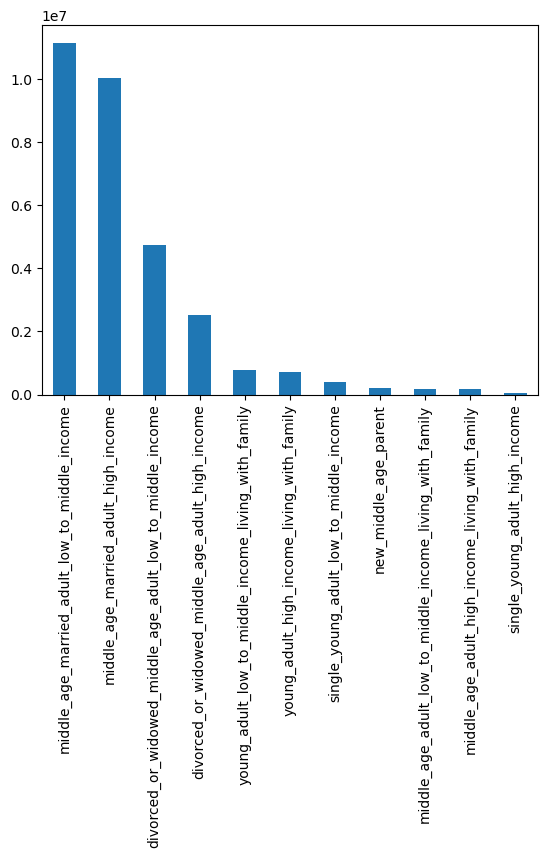

In [43]:
# Step 6 - Create bar chart - Customer profile - frequency
bar1=df_new_['profile'].value_counts().plot.bar()

In [44]:
# Export visualizations as “.png” files 
bar1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_frequency.png'))

In [45]:
# Step 7 
df_new_.groupby('profile').agg({'days_since_prior_order':['max', 'mean', 'min']})

days_since_prior_order  \
                                                                      max   
profile                                                                     
divorced_or_widowed_middle_age_adult_high_income                     30.0   
divorced_or_widowed_middle_age_adult_low_to_mid...                   30.0   
middle_age_adult_high_income_living_with_family                      30.0   
middle_age_adult_low_to_middle_income_living_wi...                   30.0   
middle_age_married_adult_high_income                                 30.0   
middle_age_married_adult_low_to_middle_income                        30.0   
new_middle_age_parent                                                30.0   
single_young_adult_high_income                                       30.0   
single_young_adult_low_to_middle_income                              30.0   
young_adult_high_income_living_with_family                           30.0   
young_adult_low_to_middle_income_living_with_fa...                   30.0   

                                                                    
                                                         mean  min  
profile                                                             
divorced_or_widowed_middle_age_adult_high_income    10.703401  0.0  
divorced_or_widowed_middle_age_adult_low_to_mid...  10.812292  0.0  
middle_age_adult_high_income_living_with_family     10.465159  0.0  
middle_age_adult_low_to_middle_income_living_wi...  10.933443  0.0  
middle_age_married_adult_high_income                10.793366  0.0  
middle_age_married_adult_low_to_middle_income       10.871272  0.0  
new_middle_age_parent                                9.659560  0.0  
single_young_adult_high_income                      11.047862  0.0  
single_young_adult_low_to_middle_income             11.073167  0.0  
young_adult_high_income_living_with_family          10.590172  0.0  
young_adult_low_to_middle_income_living_with_fa...  10.898969  0.0

In [46]:
# Step 8 - Create crosstab
crosstab_r= pd.crosstab(df_new_['profile'], df_new_['region'], dropna = False)


In [47]:
crosstab_r

region,Midwest,Northeast,South,West
profile,,,,
divorced_or_widowed_middle_age_adult_high_income,604420,436692,844189,650399
divorced_or_widowed_middle_age_adult_low_to_middle_income,1121164,833421,1572684,1214040
middle_age_adult_high_income_living_with_family,39603,32662,55911,38396
middle_age_adult_low_to_middle_income_living_with_family,51606,29032,59837,49963
middle_age_married_adult_high_income,2391600,1795287,3289010,2545063
middle_age_married_adult_low_to_middle_income,2555216,1958750,3747372,2892659
new_middle_age_parent,49237,38042,71619,52846
single_young_adult_high_income,15522,6809,22289,17023
single_young_adult_low_to_middle_income,81710,77560,142771,98988


In [48]:
crosstab_r.to_clipboard()

In [49]:
# Step 8 - Create crosstab
crosstab_d= pd.crosstab(df_new_['department_id'], df_new_['profile'], dropna = False)


In [50]:
crosstab_d

profile,divorced_or_widowed_middle_age_adult_high_income,divorced_or_widowed_middle_age_adult_low_to_middle_income,middle_age_adult_high_income_living_with_family,middle_age_adult_low_to_middle_income_living_with_family,middle_age_married_adult_high_income,middle_age_married_adult_low_to_middle_income,new_middle_age_parent,single_young_adult_high_income,single_young_adult_low_to_middle_income,young_adult_high_income_living_with_family,young_adult_low_to_middle_income_living_with_family
department_id,,,,,,,,,,,
1,177924,320349,11352,13535,703354,761149,0,3995,27080,49334,53659
2,2847,5310,170,173,11163,12376,0,61,496,838,977
3,94844,170044,6006,7001,374433,398309,0,2356,14151,26881,26803
4,754145,1385386,51713,54027,3011332,3256221,0,17843,118067,211802,218737
5,13366,21531,1094,629,47142,50556,0,540,1390,3851,4528
6,21733,38561,1391,1677,85120,90948,0,572,3595,6129,6265
7,202008,404093,12397,16893,801615,976548,0,5153,34087,53520,65587
8,8853,13190,589,554,30793,32184,0,110,1449,2602,2736
9,69350,122498,4720,4844,279886,288848,0,1659,10789,19773,19769


In [51]:
crosstab_d.to_clipboard()

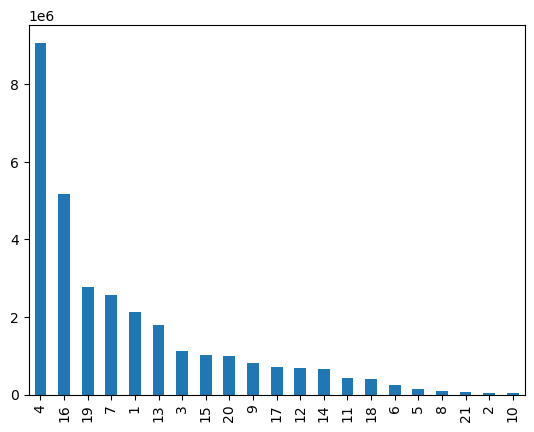

In [52]:
# Create bar chart - Frequency of departments 

bar_departments=df_new_['department_id'].value_counts().plot.bar()

In [53]:
# Export visualizations as “.png” files 
bar_departments.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_frequency_of_departments.png'))

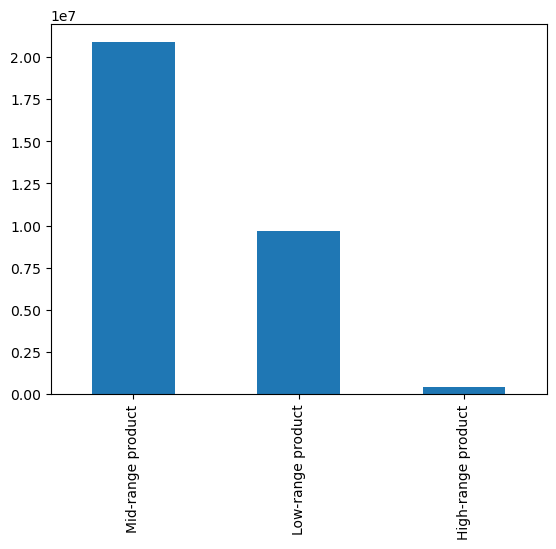

In [54]:
# Create bar chart for the 'price_range_loc' column - Frequency of products
bar_price_range=df_new_['price_range_loc'].value_counts().plot.bar()

In [55]:
# Export visualizations as “.png” files 
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_frequency_of_products.png'))

In [56]:
# Ordering habits based on customer's loyalty
crosstab_o= pd.crosstab(df_new_['department_id'], df_new_['loyalty_flag'], dropna = False)

In [57]:
crosstab_o

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,609460,372271,1140000
2,10715,5839,17857
3,379873,172104,568851
4,3147376,1336604,4595293
5,38723,28629,77275
6,78394,43841,133756
7,855017,396649,1320235
8,25469,15880,51711
9,242580,144836,434720


In [58]:
crosstab_o.to_clipboard()

In [59]:
df_new_.groupby('profile').agg({'prices':['max', 'mean', 'min']})

prices               
                                                      max      mean  min
profile                                                                 
divorced_or_widowed_middle_age_adult_high_income     25.0  7.947118  1.0
divorced_or_widowed_middle_age_adult_low_to_mid...   25.0  7.708089  1.0
middle_age_adult_high_income_living_with_family      25.0  7.927853  1.0
middle_age_adult_low_to_middle_income_living_wi...   25.0  7.661574  1.0
middle_age_married_adult_high_income                 25.0  7.957677  1.0
middle_age_married_adult_low_to_middle_income        25.0  7.642944  1.0
new_middle_age_parent                                15.0  7.639059  1.0
single_young_adult_high_income                       25.0  7.947466  1.0
single_young_adult_low_to_middle_income              25.0  7.732446  1.0
young_adult_high_income_living_with_family           25.0  7.963125  1.0
young_adult_low_to_middle_income_living_with_fa...   25.0  7.651413  1.0

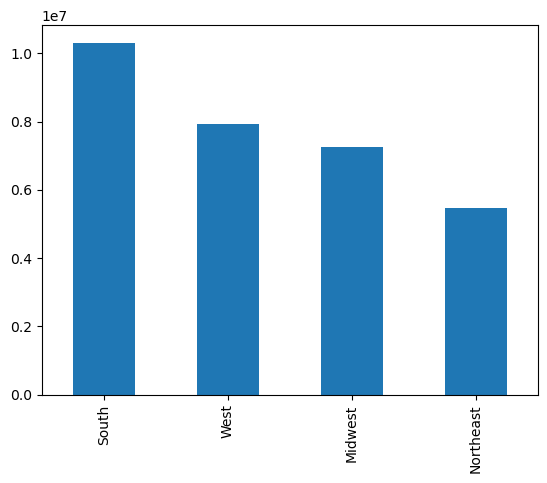

In [60]:
# Create bar chart for the 'region' column - Frequency of regions
bar_region=df_new_['region'].value_counts().plot.bar()

In [61]:
# Export visualizations as “.png” files 
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_frequency_of_regions.png'))

In [62]:
# Ordering habits based on customer's region
crosstab_d_r= pd.crosstab(df_new_['department_id'], df_new_['region'], dropna = False)

In [63]:
crosstab_d_r

region,Midwest,Northeast,South,West
department_id,,,,
1,498225,370436,709906,543164
2,7983,6268,11579,8581
3,261753,199300,371620,288155
4,2134115,1593004,3027476,2324678
5,34043,25017,48813,36754
6,60666,44678,84649,65998
7,598979,462929,859419,650574
8,21358,17734,29909,24059
9,193463,143817,272813,212043


In [64]:
crosstab_d_r.to_clipboard()

### 08. Export data

In [65]:
# Step 10 - Export df_new_ dataframe in pickle format as 'final_data_set.pkl'
  
df_new_.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_set.pkl'))